In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon

# Demonstration of the Central Limit Theorem

The Central Limit Theorem states that the distribution of the sample averages will approach a normal distribution as the sample size increases, regardless of the shape of the original distribution. The aim of this notebook is to demonstrate this theory using the exponential distribution. Let $X_{1}, X_{2}, ..., X_{n}$ be i.i.d. exponential random variables with parameter $\lambda$. If the CLT is indeed true, then we should get the following result for a sufficiently large $n$ :

\begin{align}
    P\left(\bar{X}_{n} \geq \frac{1}{\lambda}\right) 
    &\approx P\left(\frac{1}{\lambda} \left(\frac{Z_{n}}{\sqrt{n}} + 1\right) \geq \frac{1}{\lambda}\right) \\
    &= P\left(\frac{Z_{n}}{\sqrt{n}} + 1 \geq 1\right) \\
    &= P\left(Z_{n} \geq 0\right)
\end{align}

Where $ Z_n \sim N(0,1) $, $ \bar{X}_{n} $ is the sample average, and $\frac{1}{\lambda}$ is the true mean of the exponential distribution.

We choose $\lambda = 1/3$ for the simulations.

In [2]:
lambda_parameter = 1/3
n = 100
exp_dist = expon(0, 1/lambda_parameter)

We generate 10000 samples, each with 100 observations, and we estimate the probability $P\left(\bar{X}_{n} \geq \frac{1}{\lambda}\right)$

In [3]:
shape = (n, 10000)
exp_samples = exp_dist.rvs(size=shape)
exp_sample_averages = np.mean(exp_samples, axis=0)

In [4]:
probability = np.mean(exp_sample_averages >= 1/lambda_parameter)

print("The probability is ", probability)

The probability is  0.4879


Now we estimate the probability $P\left(\bar{Z}_{n} \geq 0\right)$

In [5]:
std_norm_dist = norm(0,1)
shape = (n, 10000)

norm_samples = std_norm_dist.rvs(size=shape)
norm_sample_averages = np.mean(norm_samples, axis=0)

probability = np.mean(norm_sample_averages >= 0)

print("The probability is ", probability)

The probability is  0.5041


We find that the two probabilities are approximately equal as predicted.

Next, we visually demonstrate that the sample average are approximately normally distributed around the true mean.

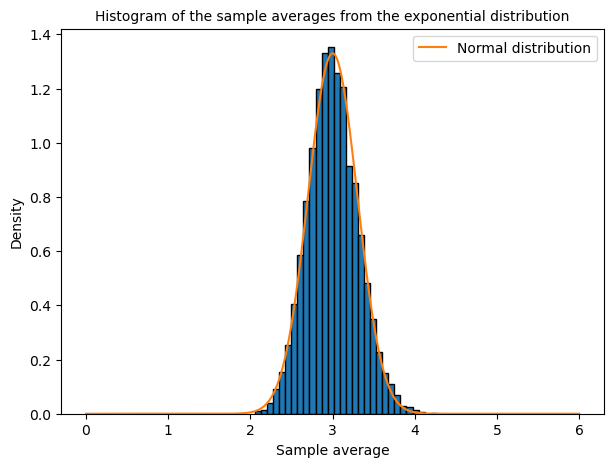

In [6]:
plt.figure(figsize=(7,5))
plt.hist(exp_sample_averages, density = True, bins = 30, edgecolor='black')

norm_dist = norm(1/lambda_parameter,(1/lambda_parameter)/(n**0.5))
xs = np.linspace(0, 6, 1000)
norm_pdf_values = norm_dist.pdf(xs)
plt.plot(xs, norm_pdf_values, label = "Normal distribution")

plt.title("Histogram of the sample averages from the exponential distribution", fontsize=10)
plt.xlabel("Sample average")
plt.ylabel("Density")
plt.legend()